### H(z) Reconstrution via Gaussian Process (GP)

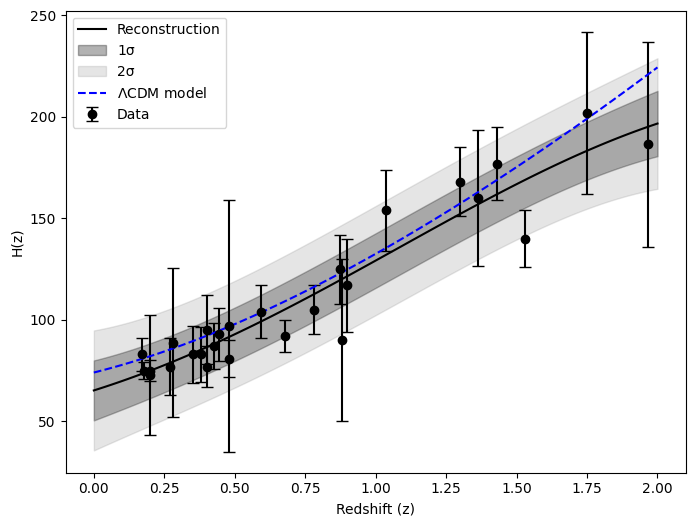

In [1]:
from gaussian_process import GPReconstructionH
from plot_rec_H import HReconstructionPlot
from obs_data import H_data
from equations import FiducialModel

# Utilização da classe
gp_h = GPReconstructionH()
gp_h.optimize(num_restarts=10, verbose=False)
mean, var, mean_deriv, var_deriv = gp_h.predict()
z_values = H_data.z_func()
H_obs = H_data.H_func()
errors = H_data.errors_func()
fiducial_model = FiducialModel()

plotter = HReconstructionPlot(gp_h, z_values, H_obs, errors, fiducial_model)
plotter.plot('Figuras/H_reconstructed.png')

### H(z) Reconstrution via Artificial Neural Network (ANN): ReFANN code

In [ ]:
import refann as rf
import time
import numpy as np
import matplotlib.pyplot as plt

# Starting the ANN
start_time = time.time()

H_dt = H_data()    
# Obter os dados
z = H_dt.z_func()
H = H_dt.H_func()
errors = H_dt.errors_func()

# Salvar em arquivo.txt
with open('data/H_obs.txt', 'w') as file:
    for z_val, H_val, error in zip(z, H, errors):
        file.write(f"{z_val}\t{H_val}\t{error}\n")

Hz = np.loadtxt('data/H_obs.txt')

rec = rf.ANN(Hz,mid_node=4096,hidden_layer=1,hp_model='rec_2')
rec.iteration = 30000
rec.train()
func = rec.predict(xpoint=np.linspace(0, 2, 201))
#func = rec.predict(xspace=(0, 2, 201)) #or use this
rec.save_func(path='data', obsName='Hz31') #save the reconstructed function

# rec.plot_loss()
rec.plot_func()
print ("Time elapsed: %.3f mins" %((time.time()-start_time)/60))
plt.show()

# Generating FRBs Mock data

#### DM_IGM reconstruction throught GP

 /home/lazarolima/.local/lib/python3.12/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/lazarolima/.local/lib/python3.12/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /home/lazarolima/.local/lib/python3.12/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/lazarolima/.local/lib/python3.12/site-packages/GPy/kern/src/rbf.py:178: RuntimeWarning:invalid value encountered in multiply
 /home/lazarolima/cosmology_reconstruction_frb/plot_rec_DM.py:20: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
 /home/lazarolima/cosmology_reconstruction_frb/plot_rec_DM.py:21: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


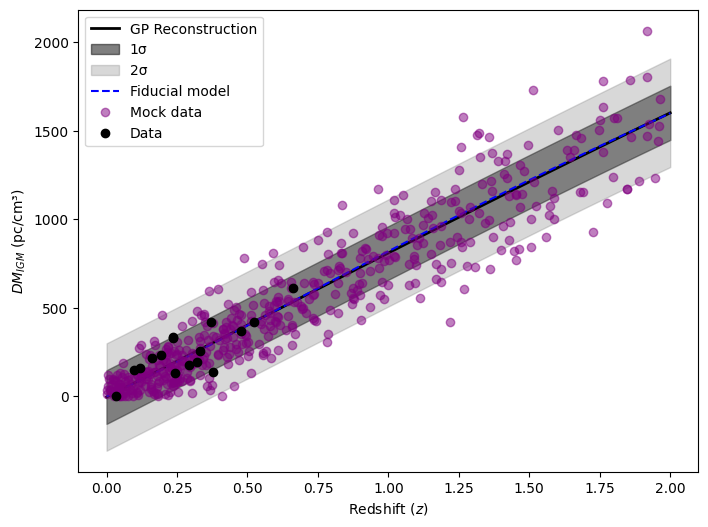

In [6]:
from mock import RedshiftSimulation
from gaussian_process import GPReconstructionDMIGM
from plot_rec_DM import DMIGMReconstructionPlot
import numpy as np

# Parâmetros para gerar novos dados
n_new = 500  # Número de novos pontos de dados
z_max = 2  # Máximo redshift

# Criar uma instância da classe RedshiftSimulation
sim = RedshiftSimulation(n_new, z_max)

# Gerar novos dados
sim.generate_redshifts()
sim.simulate_DM_IGM()
sim.sigma_DM_IGM_sim()

# Obter os resultados
new_z = sim.get_new_z()
DM_IGM_sim = np.abs(sim.get_DM_IGM_sim())
sigma_DM_IGM_sim = sim.get_sigma_DM_IGM_sim()

# Utilização da classe
gp_dm_igm = GPReconstructionDMIGM()
gp_dm_igm.optimize(num_restarts=10, verbose=False)

plotter = DMIGMReconstructionPlot(gp_dm_igm, new_z, DM_IGM_sim)
plotter.plot('Figuras/DM_IGM_reconstructed.png')

In [ ]:
# Obter valores de predição
mean1, var1, mean_deriv1, var_deriv1 = gp.pred_new()

# Plotar as derivadas
plt.figure(figsize=(8, 6))
plt.plot(gp.z_pred(), mean_deriv1.flatten(), 'k-', label='Derivative reconstrution')

# Adicionar curvas sombreadas de 1σ e 2σ para a derivada
plt.fill_between(gp.z_pred().flatten(), 
                 mean_deriv1.flatten() - 1*np.sqrt(var_deriv1.flatten()), 
                 mean_deriv1.flatten() + 1*np.sqrt(var_deriv1.flatten()), 
                 alpha=0.3, color='k', label='1σ')
plt.fill_between(gp.z_pred().flatten(), 
                 mean_deriv1.flatten() - 2*np.sqrt(var_deriv1.flatten()), 
                 mean_deriv1.flatten() + 2*np.sqrt(var_deriv1.flatten()), 
                 alpha=0.2, color='gray', label='2σ')

# Derivada de DM_IGM
dm_igm_deriv = model.I(gp.z_pred().flatten())
plt.plot(gp.z_pred().flatten(), dm_igm_deriv, 'b--', label='Model derivative')

plt.xlabel('Redshift (z)')
plt.ylabel('$dDM_{IGM}/dz$ (pc/cm$^{3}$)')
plt.legend()
plt.grid(True)
plt.savefig('Figuras/dDM_IGM_reconstructed.png', dpi=600)

#### DM_IGM reconstruction throught ANN

In [ ]:
DM_IGM = np.loadtxt('data/DM_IGM_sim.txt')

rec = rf.ANN(DM_IGM,mid_node=4096,hidden_layer=1,hp_model='rec_2')
rec.iteration = 30000
rec.train()
func = rec.predict(xpoint=np.linspace(0, 2, 201))
#func = rec.predict(xspace=(0, 2, 201)) #or use this
rec.save_func(path='data', obsName='DM_IGM') #save the reconstructed function

# rec.plot_loss()
rec.plot_func()


print ("Time elapsed: %.3f mins" %((time.time()-start_time)/60))
plt.show()

# Bayesian analyses and MCMC

### Defining priors

In [ ]:
from likelihood import Priors, LikelihoodFunction
from equations import H_Model

model = H_Model()

# Defining the prior intervals manually
intervals_constant = [(0, 1)]  # Interval for $f_{IGM}$
intervals_p2 = [(0, 1), (0, 5)]  # Intervals for $f_{IGM}$ and $\alpha$
intervals_p3 = [(0, 1), (0, 5)]  # Intervals for $f_{IGM}$ and $\alpha$
intervals_p4 = [(0, 1), (-5, 5)]  # Intervals for $f_{IGM}$ and $s$

# Creating specific instances of the priors
P_constant = Priors(['$f_{IGM}$'], intervals_constant)
P_p2 = Priors(['$f_{IGM}$', '$\\alpha$'], intervals_p2)
P_p3 = Priors(['$f_{IGM}$', '$\\alpha$'], intervals_p3)
P_p4 = Priors(['$f_{IGM}$', '$s$'], intervals_p4)

# Creating an instance of the likelihood model
LF_constant = LikelihoodFunction(lambda z, f_IGM: model.H_p(z, f_IGM, None, 'constant'))
LF_p2 = LikelihoodFunction(lambda z, f_IGM, alpha: model.H_p(z, f_IGM, alpha, 'p2'))
LF_p3 = LikelihoodFunction(lambda z, f_IGM, alpha: model.H_p(z, f_IGM, alpha, 'p3'))
LF_p4 = LikelihoodFunction(lambda z, f_IGM, s: model.H_p(z, f_IGM, s, 'p4'))

### Preparing the samples

In [ ]:
from obs_data import H_data
import ultranest

z_values = H_data.z_func()
H_obs = H_data.H_func()
errors = H_data.errors_func()
model = H_Model()

# Configuring the ultranest samplers
sampler_constant = ultranest.ReactiveNestedSampler(P_constant.param_names,
    lambda params: LF_constant.log_likelihood(params, z_values, H_obs, errors),
    P_constant.prior_transform
)

sampler_p2 = ultranest.ReactiveNestedSampler(P_p2.param_names,
    lambda params: LF_p2.log_likelihood(params, z_values, H_obs, errors),
    P_p2.prior_transform
)

sampler_p3 = ultranest.ReactiveNestedSampler(P_p3.param_names,
    lambda params: LF_p3.log_likelihood(params, z_values, H_obs, errors),
    P_p3.prior_transform
)

sampler_p4 = ultranest.ReactiveNestedSampler(P_p4.param_names,
    lambda params: LF_p4.log_likelihood(params, z_values, H_obs, errors),
    P_p4.prior_transform
)


In [ ]:
result1 = sampler_constant.run(min_num_live_points=400)
sampler_constant.print_results()

In [ ]:
result2 = sampler_p2.run(min_num_live_points=400)
sampler_p2.print_results()

In [ ]:
result3 = sampler_p3.run(min_num_live_points=400)
sampler_p3.print_results()

In [ ]:
result4 = sampler_p4.run(min_num_live_points=400)
sampler_p4.print_results()

In [ ]:
from getdist import plots, MCSamples

# Extraindo amostras dos resultados
samples1 = result1['samples']
samples2 = result2['samples']
samples3 = result3['samples']
samples4 = result4['samples']

# Criando objetos MCSamples com os dados
labels1 = ['f_{IGM,0}']
names1 = ['f_IGM']
mcsamples1 = MCSamples(samples=samples1, names=names1, labels=labels1)

labels2 = ['f_{IGM,0}', '\\alpha']
names2 = ['f_IGM', 'alpha']
mcsamples2 = MCSamples(samples=samples2, names=names2, labels=labels2)
mcsamples3 = MCSamples(samples=samples3, names=names2, labels=labels2)

labels3 = ['f_{IGM,0}', 's']
names3 = ['f_IGM', 's']
mcsamples4 = MCSamples(samples=samples4, names=names3, labels=labels3)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples1.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples1, filled=True, contour_colors=['green'], 
                legend_labels=['P. 1'], 
                title_limit=1)
g.export('Figuras/H_p1.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples2.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples2, filled=True, contour_colors=['red'],
                legend_labels=['P. 2'], title_limit=1)
g.export('Figuras/H_p2.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples3.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples3, filled=True, contour_colors=['blue'],
                legend_labels=['P. 3'], title_limit=1)
g.export('Figuras/H_p3.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples4.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot(mcsamples4, filled=True, contour_colors=['purple'],
                legend_labels=['P. 4'], title_limit=1)
g.export('Figuras/H_p4.png', dpi=600)

In [ ]:
from ultranest.plot import PredictionBand
from equations import H_Model

plt.figure()
plt.xlabel('$z$')
plt.ylabel('H(z)')
plt.errorbar(x=z_values, y=H_obs, yerr=errors, marker='o', capsize=3, ls=' ', color='purple', label='$DM_{ext}^{obs}$')

band = PredictionBand(z_test.flatten())

# go through the solutions
for f_IGM  in sampler_constant.results['samples']:
    # compute for each time the y value
    model = H_Model()
    band.add(model.H_p(z_test.flatten(), f_IGM=f_IGM))

band.line(color='k', linestyle='--', label='$H_{P1}$', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='k', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='gray', alpha=0.2)

plt.legend()
plt.savefig('Figuras/H_bestfit.png', format='png', dpi=600)